# 1. Introduction

## To get started, please write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples?

- 1) Медицинская диагностика  - предсказание характера опухоли (доброкачественная/злокачественная); - классификация
- 2) Кредитные решения - оценка финансовых возможностей конкретного клиента;  - классификация
- 3) Предсказание притока и оттока клиентов в стриминг-сервисы, онлайн-кинотеатры; - регрессия
- 4) Показ объявлений по актуальности на авито/циан/etc; - ранжирование
- 5) Задачи биометрической идентификации личности (метод Даугмана с разверткой сетчатки глаза). - классификация

## Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided.

- Классификация задач МЛ во введении упоминает обучение с учителем (задачи регрессии  и классификации) и без учителя (кластеризация, ассоциация, снижение размерности).

**с учителем**
- Регрессия: 1- предсказание цен домов, 3- когда пациент должен принять лекарство, 7- решить, как располагать продукты в супермаркете.
- Классификация: 2- вернет клиент долг или нет, 4- какое лекарство должен принять пациент, 5- выбор сегмента клиентов для промо-акции, 6- распознавание дефектных продуктов по фото, 8- поиск сайтов по вводу текстового запроса, 10- аномалии в траффике сайта.

**без учителя**
- Кластеризация: 5- выбор сегмента клиентов для промо-акции, 9 - разделение потребителей на сегменты;
- Ассоциация: 5- выбор сегмента клиентов для промо-акции.
- Снижение размерности - тоже 5 и 9.

## Think about what the difference is between multiclass and multilabel.

- Мультикласс (классификация по многим классам) - когда проблема классификации должна предсказывать несколько (больше 2х) классов, однако каждый объект может относиться только к одному из этих классов. пример: классификация фруктов на груши, яблоки и апельсины.
- Мультилейбл (классификация по многим меткам) - также предсказывается несколько классов, но каждый объект может относиться одновременно к нескольким классам. пример: классификация опухолей по происхождению и характеру.

## Is an example case with house prices from the theory a classification or a regression problem? Is it possible to reduce the regression problem to classification?

- Да, задачу предсказания цены домов можно считать примером задачи регрессии, потому что стоимость квартиры можно представить как взвешенную сумму разнотипных признаков (близость к метро, ремонт, жилая площадь, наличие быт. техники)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lightgbm as lgb
import scipy as sp
import statsmodels as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Intro to Data analysis

- Load data from kaggle using pandas. You only need the table data, which is in train.json.

In [3]:
filepath = "/content/drive/MyDrive/Colab Notebooks/train.json"

- What is the size (the number of rows and columns) of your data?

In [4]:
df = pd.read_json(filepath)
df.shape

(49352, 15)

- Print the list of columns. Which column is a target? Target - price.

In [5]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

In [6]:
df.sample(5, random_state=21)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
26367,1.0,2,c94301249b8c09429d329864d58e5b82,2016-06-17 06:11:41,Massive flex 2 penthouse offers light-filled r...,Gold Street,"[Swimming Pool, Roof Deck, Doorman, Elevator, ...",40.7074,7178315,-74.0069,69f035007d270281a624ab2cc1d2aba0,[https://photos.renthop.com/2/7178315_1f5a6e24...,3750,2 Gold Street,low
25212,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-01 06:16:10,"THE APT-LARGE FLEX 2,KING SIZE ROOMS,OVER SIZE...",East 56th Street,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7575,7093824,-73.9625,293a5d2579bc2eb7b20736ae2395e9e5,[https://photos.renthop.com/2/7093824_fd31ad00...,3500,405 East 56th Street,medium
34599,1.0,0,51466f9127f3a4c45f4b84ec40739606,2016-06-16 02:26:00,Classic West Village Studio on Charles St. Out...,Charles Street,"[Garden/Patio, Loft, Dishwasher, Hardwood Floo...",40.7344,7167172,-74.0057,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7167172_505e2cac...,2425,108 Charles Street,low
90454,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-21 03:25:36,NO FEE!!!! 1BR/1BA with granite counter tops a...,East 49th Street,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7539,6905526,-73.9677,9d32b720e26a351b951c8f78f72f2fec,[https://photos.renthop.com/2/6905526_08947ee5...,3600,333 East 49th Street,low
55051,2.0,2,ed522b45f275b7f2d6261575638e75d0,2016-05-13 02:50:12,ELEVATOR - LAUNDRY - SS APPLIANCES - RECESSED ...,St. Nicholas Avenue,"[Elevator, Dogs Allowed, Cats Allowed]",40.8322,7005178,-73.9412,23fe9db389d31048a104bd4686879a77,[https://photos.renthop.com/2/7005178_00651c09...,2700,935 St. Nicholas Avenue,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [8]:
df['listing_id'] = df['listing_id'].astype('str')

In [9]:
df['bathrooms'] = df['bathrooms'].astype('int')

- Make a quick analysis of the data: use the methods info(), describe(), corr(). Explain the results of the outputs. Are there any empty columns?

In [10]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price
count,49352.000000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.201775,1.541640,40.741545,-73.955716,3.830174e+03
std,0.489701,1.115018,0.638535,1.177912,2.206687e+04
min,0.000000,0.000000,0.000000,-118.271000,4.300000e+01
25%,1.000000,1.000000,40.728300,-73.991700,2.500000e+03
50%,1.000000,1.000000,40.751800,-73.977900,3.150000e+03
75%,1.000000,2.000000,40.774300,-73.954800,4.100000e+03
max,10.000000,8.000000,44.883500,0.000000,4.490000e+06


In [11]:
df.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,longitude,price
bathrooms,1.000000,0.526381,-0.010297,0.010811,0.068439
bedrooms,0.526381,1.000000,-0.004745,0.006892,0.051788
latitude,-0.010297,-0.004745,1.000000,-0.966807,-0.000707
longitude,0.010811,0.006892,-0.966807,1.000000,-0.000087
price,0.068439,0.051788,-0.000707,-0.000087,1.000000


In [12]:
df.isna().sum()

,0
bathrooms,0
bedrooms,0
building_id,0
created,0
description,0
display_address,0
features,0
latitude,0
listing_id,0
longitude,0


- We'll work with only 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with the target column 'price'. Create a dataframe with only these columns.

In [13]:
new_df = df[["bathrooms"] + ["bedrooms"] + ["interest_level"] +["price"]]
new_df.shape

(49352, 4)

In [14]:
new_df.sample(5, random_state=21)

,bathrooms,bedrooms,interest_level,price
26367,1,2,low,3750
25212,1,2,medium,3500
34599,1,0,low,2425
90454,1,1,low,3600
55051,2,2,low,2700


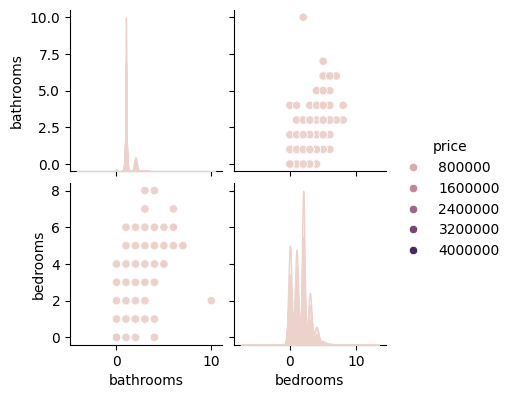

In [15]:
sns.pairplot(new_df, hue="price", height=2)
plt.show()

# 3. Statistical Data Analysis

## Target analysis

In [16]:
new_df['price'].max()

4490000

- Plot a histogram to understand the distribution of the target. Is it all clear? - not clear

In [17]:
def plot_histogram(data, x:pd.Series, name='Name of column') -> None:
  sns.set_style("whitegrid")
  sns.set_context(font_scale=1.5)
  plt.figure(figsize=(10, 6))
  sns.histplot(data=data, x=x, kde=True)
  plt.xlim(max(0, x.min() - 1000), x.max()*1.05)
  plt.title("Histogram of Rental Prices", fontsize=16, pad=20)
  plt.xlabel(name)
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

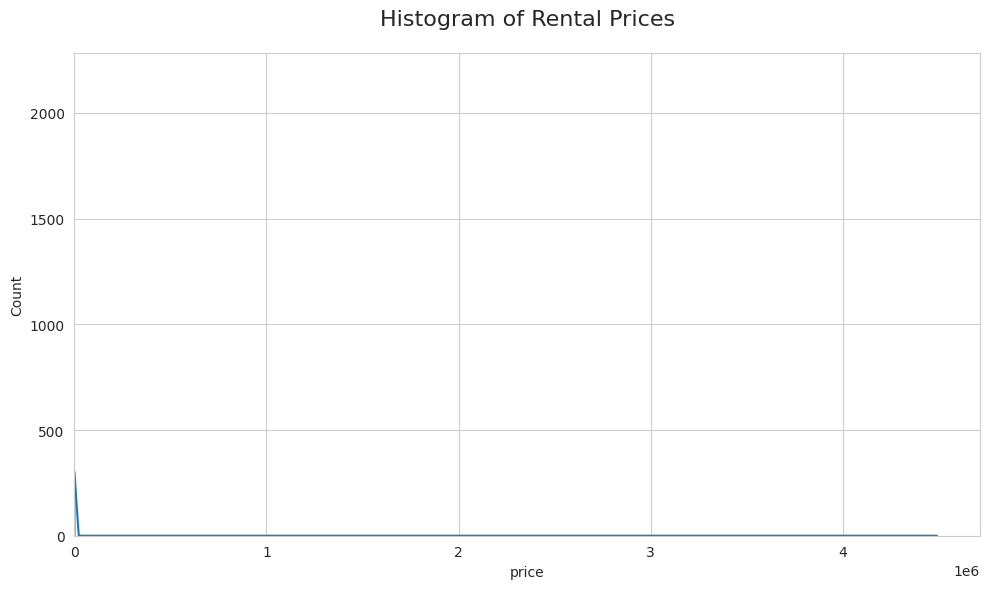

In [18]:
plot_histogram(new_df, new_df['price'], 'price')

- The next step is boxplot(). What can you say about the target? Are there any outliers? - We can clearly see some outliers (white dots)

In [19]:
def plot_boxplot(data, x) -> None:
  sns.set_style("whitegrid")
  sns.set_context(font_scale=1.5)
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=data, x=x, linewidth =2, fliersize=5, width=0.5)
  plt.xlim(max(0, x.min() - 1000), x.max()*1.05)
  plt.title("Distribution of Rental Prices", fontsize=16, pad=20)
  plt.xlabel("Price")
  plt.ylabel("Count")
  mean_price = x.mean()
  plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
  plt.legend()
  plt.show()

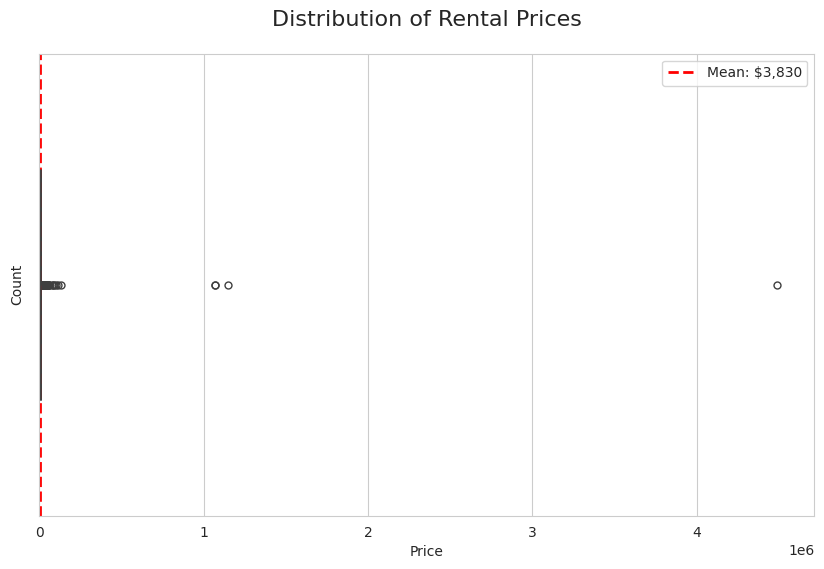

In [20]:
plot_boxplot(new_df, new_df["price"])

- Drop the rows that are outside the 1 and 99 percentiles from the target column.

In [21]:
def cleaner(data, column_name:str) -> pd.DataFrame:
  q1 = data[column_name].quantile(q=0.01)
  q2 = data[column_name].quantile(q=0.99)
  cleaned_data = data[(data[column_name] > q1) & (data[column_name] < q2)].reset_index(drop=True)
  return cleaned_data

In [22]:
cleaned_df = cleaner(new_df, "price")

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48343 entries, 0 to 48342
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bathrooms       48343 non-null  int64 
 1   bedrooms        48343 non-null  int64 
 2   interest_level  48343 non-null  object
 3   price           48343 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Plot another histogram for price. Explain the result. - We removed outliers, so now we can see the distribution of the target

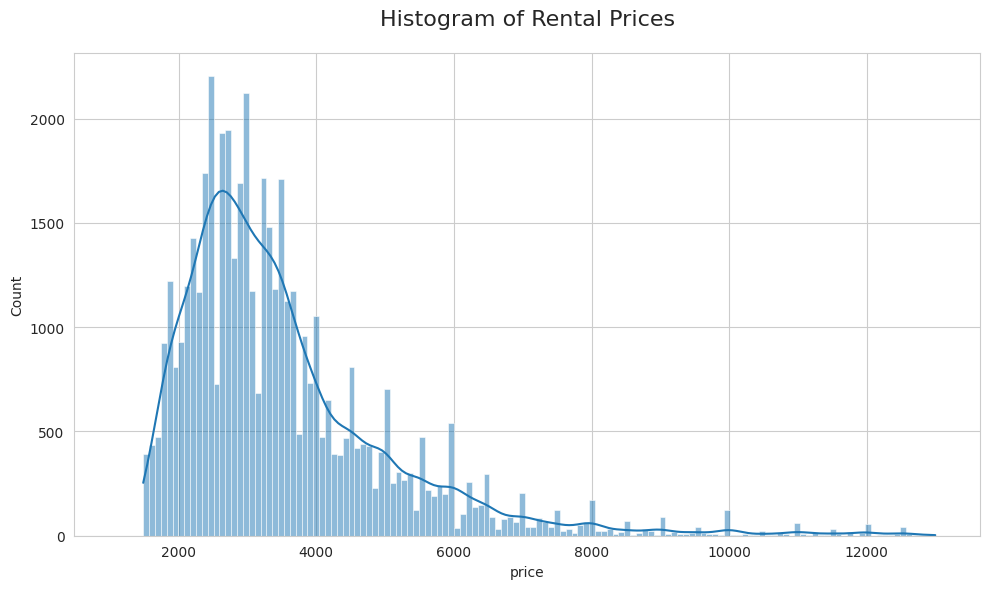

In [24]:
plot_histogram(cleaned_df, cleaned_df['price'], 'price')

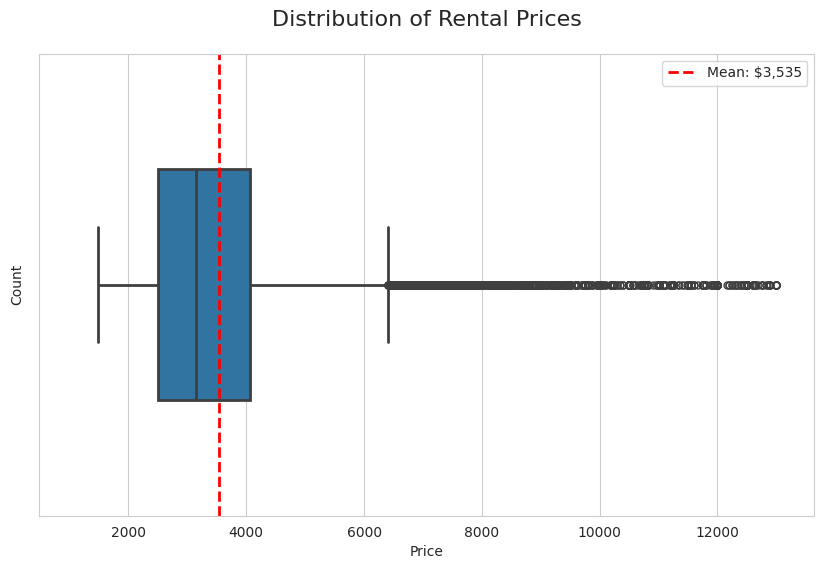

In [25]:
plot_boxplot(cleaned_df, cleaned_df['price'])

## Characteristics Analysis

- What is the type of column 'interest_level'? - object, categorical

In [26]:
cleaned_df.dtypes

,0
bathrooms,int64
bedrooms,int64
interest_level,object
price,int64


- Print the values in this column. How many entries does each value contain?

In [27]:
cleaned_df["interest_level"].unique()

array(['medium', 'low', 'high'], dtype=object)

In [28]:
low_count = (cleaned_df['interest_level'] == "low").sum()
medium_count = (cleaned_df['interest_level'] == "medium").sum()
high_count = (cleaned_df['interest_level'] == "high").sum()
low_count, medium_count, high_count

(np.int64(33672), np.int64(11114), np.int64(3557))

- Encode these values. For example, you can replace each value with 0, 1, or 2.

In [29]:
cleaned_df.iloc[cleaned_df['interest_level'] == 'low', cleaned_df.columns == 'interest_level'] = 0
cleaned_df.iloc[cleaned_df['interest_level'] == 'medium', cleaned_df.columns == 'interest_level'] = 1
cleaned_df.iloc[cleaned_df['interest_level'] == 'high', cleaned_df.columns == 'interest_level'] = 2
cleaned_df.loc[:,'interest_level'] = cleaned_df['interest_level'].astype(int)

In [30]:
cleaned_df.sample(5, random_state=21)

,bathrooms,bedrooms,interest_level,price
14999,1,1,0,2650
28407,2,2,0,4000
16080,1,1,0,3715
32381,1,1,0,4700
19993,3,3,0,10680


- Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers? - можно считать, что нет.

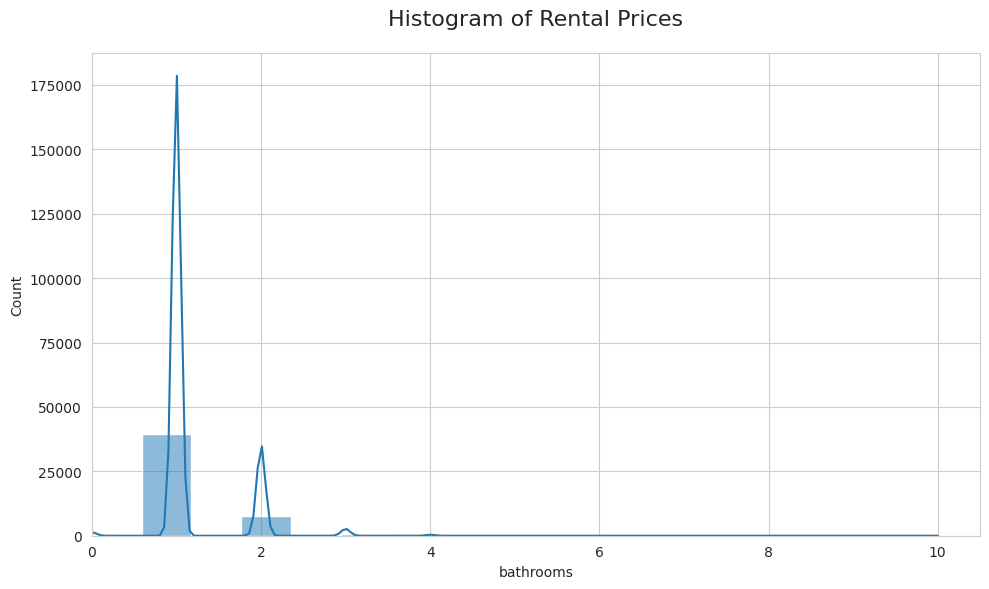

In [31]:
plot_histogram(cleaned_df, cleaned_df['bathrooms'],'bathrooms')

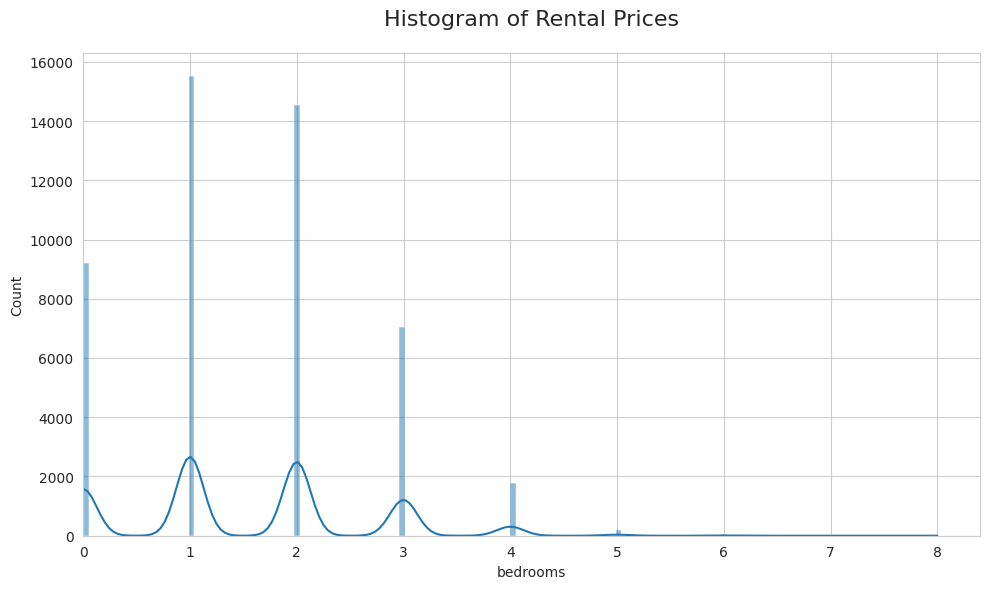

In [32]:
plot_histogram(cleaned_df, cleaned_df['bedrooms'],'bedrooms')

## Complex analysis

- Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation?

In [33]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48343 entries, 0 to 48342
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bathrooms       48343 non-null  int64 
 1   bedrooms        48343 non-null  int64 
 2   interest_level  48343 non-null  object
 3   price           48343 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [34]:
def get_corr_matrix(data) -> None:
  matrix = data.corr(numeric_only=True)
  plt.figure(figsize=(10,6))
  sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
  plt.title("Correlation Matrix (Heatmap)")
  plt.show()

In [35]:
matrix = cleaned_df.corr()
matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.508878,-0.052718,0.659503
bedrooms,0.508878,1.000000,0.051282,0.547310
interest_level,-0.052718,0.051282,1.000000,-0.199652
price,0.659503,0.547310,-0.199652,1.000000


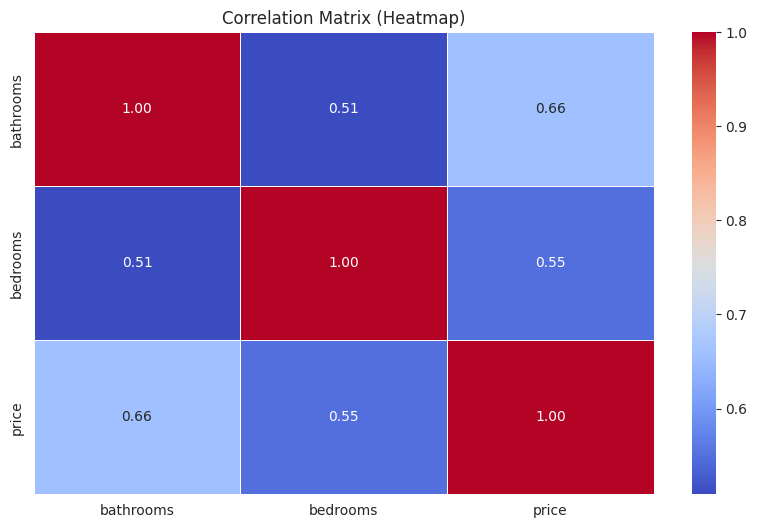

In [36]:
get_corr_matrix(cleaned_df)

- Для ванн и спален по отношению к цене есть средняя положительная линейная зависимость, для цены и уровня интереса можно считать, что нет корреляции (оч слабая негативная).

- Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.

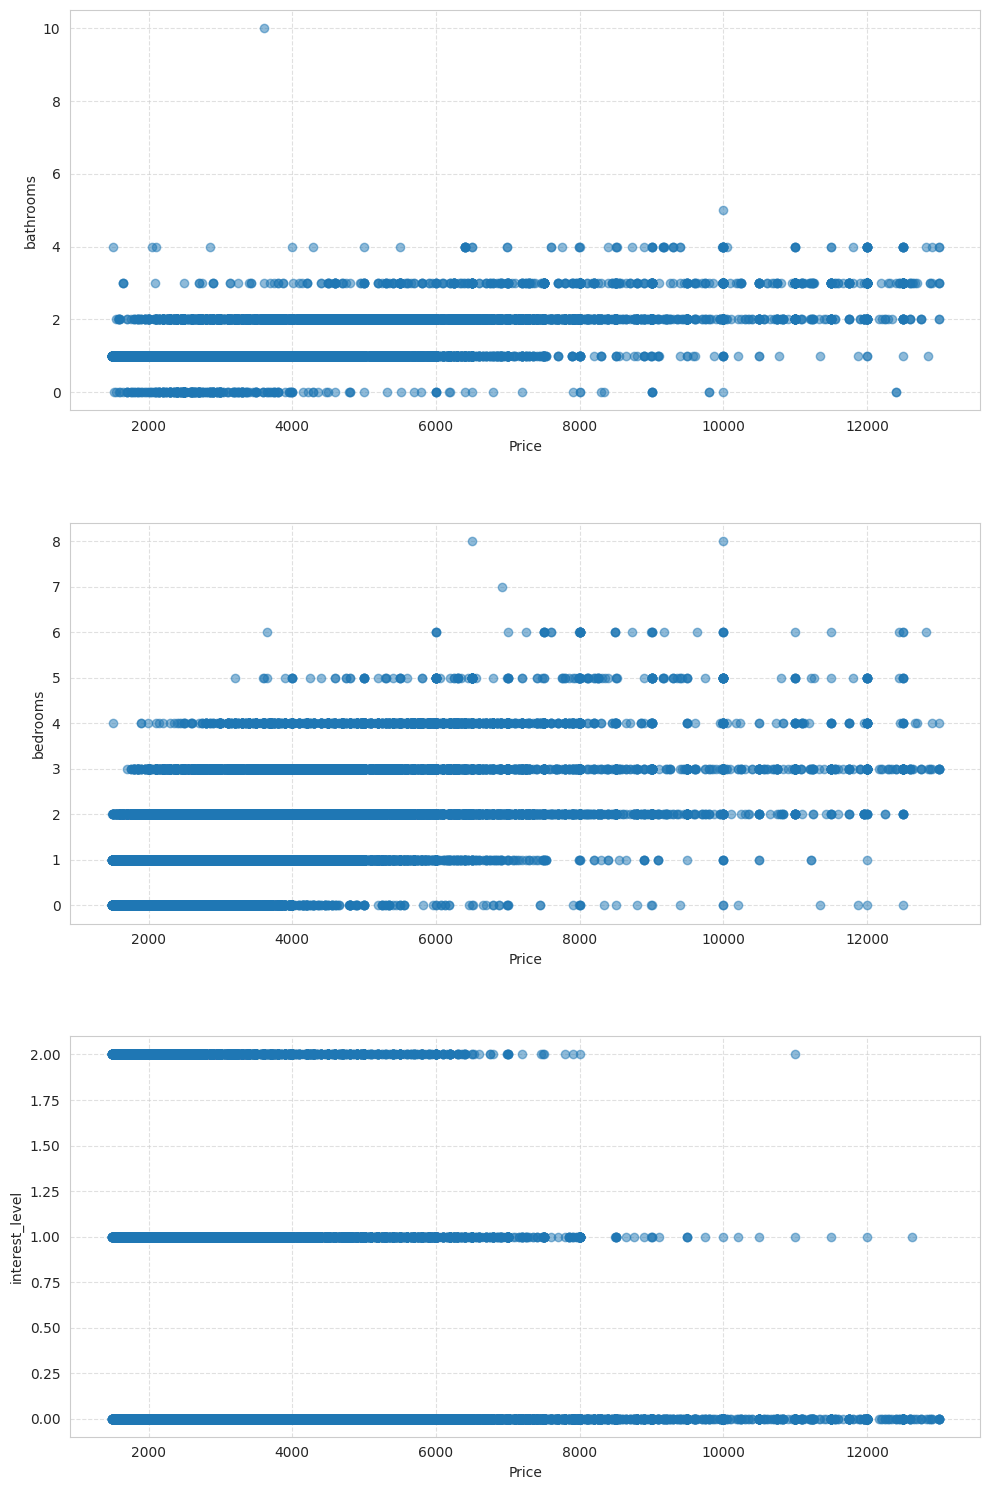

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
for ax, column in zip(axes, cleaned_df.columns[:3]):
  ax.scatter(cleaned_df['price'], cleaned_df[column], alpha=0.5)
  ax.set_xlabel("Price")
  ax.set_ylabel(column)
  ax.grid(True, linestyle='--', alpha=0.6)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout(h_pad=5.0)
plt.show()

# 4. Creating features

- This step is very broad. You can create as many features as you want. For example, you can add 3 new features that are squared: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Plot a correlation matrix with the new features. Are the new features more correlated with the target than the basic features?

In [38]:
creative_df = cleaned_df.copy()

In [39]:
creative_df.sample(5, random_state=21)

,bathrooms,bedrooms,interest_level,price
14999,1,1,0,2650
28407,2,2,0,4000
16080,1,1,0,3715
32381,1,1,0,4700
19993,3,3,0,10680


In [40]:
creative_df['bathrooms_squared'] = creative_df['bathrooms'].pow(2)
creative_df['bedrooms_log'] = np.log1p(creative_df['bedrooms'])
creative_df['interest_score'] = 2 ** creative_df['interest_level']

In [41]:
creative_df.sample(5, random_state=21)

,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_log,interest_score
14999,1,1,0,2650,1,0.693147,1
28407,2,2,0,4000,4,1.098612,1
16080,1,1,0,3715,1,0.693147,1
32381,1,1,0,4700,1,0.693147,1
19993,3,3,0,10680,9,1.386294,1


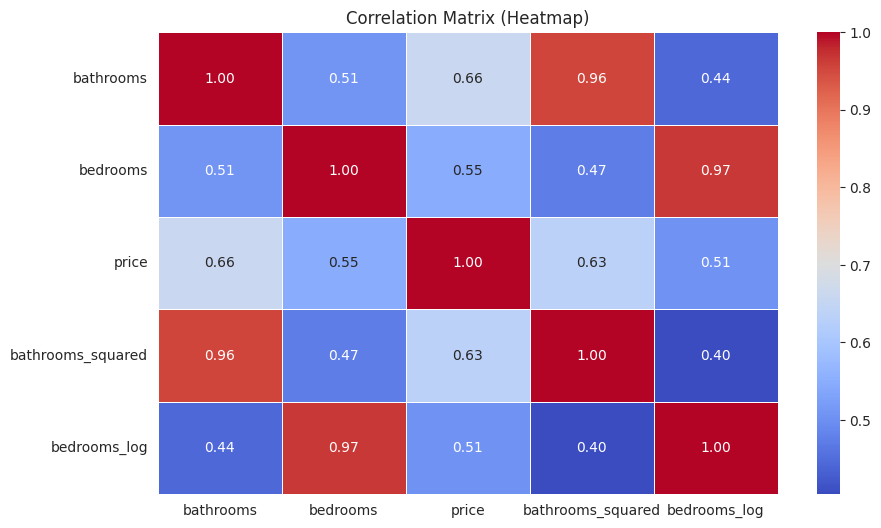

In [42]:
get_corr_matrix(creative_df)

- не появилось новых более коррелирующих

- To train the model here, we will not use your new features. Remember this example and use it in Lecture 2. To train the model, we will only consider the features 'bathrooms' and 'bedrooms'.
- To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data.

In [43]:
train_df = cleaned_df.copy()
train_x = train_df.drop('interest_level', axis=1)

train_y = cleaned_df['price']
train_x = train_x.drop('price', axis=1)

In [44]:
train_x.columns

Index(['bathrooms', 'bedrooms'], dtype='object')

In [45]:
test_df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/test.json")
common_columns = [col for col in cleaned_df.columns if col in test_df.columns]
test_df = test_df[common_columns]
test_x = test_df.drop("price", axis=1, inplace=False)

In [46]:
train_x.shape

(48343, 2)

In [47]:
test_x.shape

(74659, 2)

In [48]:
test_df = cleaner(test_df, 'bathrooms')
test_df = cleaner(test_df, 'bedrooms')
test_x = test_df[train_x.columns]
test_y = test_df['price']

In [49]:
test_x.shape

(12241, 2)

- Initialize PolynomialFeatures() with a degree of 10.
- Apply PolynomialFeatures() to fit and transform your training and test data.

In [50]:
poly = PolynomialFeatures(2) #с 10ю получается переобучение
poly.fit_transform(train_x)
poly.transform(test_x)

array([[ 1.  ,  2.  ,  2.  ,  4.  ,  4.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ,  4.  ,  8.  , 16.  ],
       [ 1.  ,  1.5 ,  2.  ,  2.25,  3.  ,  4.  ],
       ...,
       [ 1.  ,  2.5 ,  2.  ,  6.25,  5.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ,  4.  ,  8.  , 16.  ],
       [ 1.  ,  2.  ,  2.  ,  4.  ,  4.  ,  4.  ]])

# 5. Training

- Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding.

## 1. Results table

### Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.

In [51]:
dtypes = {'model': 'object', 'train': 'float64', 'test': 'float64'}
result_MAE = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)
result_MSE = pd.DataFrame(columns=['model', 'train', 'test']).astype(dtypes)

### Linear Regression

- Initialize linear regression from sklearn with no parameters.
- Fit your model and make predictions on training and test features. Save it as new columns in data.
- Compute MAE (Mean Absolute Error) on training and test targets.
- Calculate RMSE (Root Mean Square Error) on training and test objectives.
- Insert your metrics into tables result_MAE and result_RMSE with model name 'linear_regression'.

In [52]:
def get_mae(data:pd.DataFrame, real:str, predicted:str) -> float:
  mae = mean_absolute_error(data[real], data[predicted])
  return mae

In [53]:
def get_rmse(data:pd.DataFrame,real:str, predicted:str) -> float:
  rmse = np.sqrt(mean_squared_error(data[real], data[predicted]))
  return rmse

In [54]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None
        self.loss_history = []

    def fit(self, X, y, mode="non-stochastic", lr=0.001, iters=1000):
        # Преобразуем в numpy массивы для единообразия
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        y = np.array(y) if not isinstance(y, np.ndarray) else y

        n_samples, n_features = X.shape

        # Инициализация весов через скалярное произведение
        self.weights = np.zeros(n_features + 1)  # +1 для intercept
        self.weights[0] = np.mean(y)  # Инициализация intercept средним значением y

        # Инициализация весов признаков: m_j = <y, x_j> / <x_j, x_j>
        for j in range(n_features):
            x_j = X[:, j]
            # Проверка, чтобы избежать деления на ноль
            if np.dot(x_j, x_j) > 1e-10:  # Добавляем небольшую константу для стабильности
                self.weights[j+1] = np.dot(y, x_j) / np.dot(x_j, x_j)

        if mode == "analytical":
            # Аналитическое решение (нормальное уравнение)
            X_with_bias = np.c_[np.ones(n_samples), X]
            self.weights = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
            return

        # Добавляем столбец единиц для intercept
        X_with_bias = np.c_[np.ones(n_samples), X]

        for i in range(iters):
            if mode == "non-stochastic":
                gradient = self.compute_gradient(X_with_bias, y)
            elif mode == "stochastic":
                gradient = self.compute_stochastic_gradient(X_with_bias, y)

            self.weights -= lr * gradient

            if i % 100 == 0:
                loss = self.compute_loss(X_with_bias, y)
                self.loss_history.append(loss)
                print(f"Iter: {i}, Loss: {loss}")

    def compute_gradient(self, X, y):
        predictions = X @ self.weights
        error = predictions - y
        return (2 / len(y)) * X.T @ error

    def compute_stochastic_gradient(self, X, y):
        # Детерминированный выбор индекса для воспроизводимости
        idx = np.random.randint(len(y))
        x_i = X[idx]
        y_i = y[idx]

        prediction = x_i @ self.weights
        error = prediction - y_i
        return 2 * error * x_i

    def compute_loss(self, X, y):
        predictions = X @ self.weights
        return np.mean((predictions - y) ** 2)

    def predict(self, X):
        if self.weights is None:
            raise Exception("Model not fitted yet")

        # Преобразуем в numpy массив для единообразия
        X = np.array(X) if not isinstance(X, np.ndarray) else X

        # Добавляем столбец единиц для intercept
        X_with_bias = np.c_[np.ones(len(X)), X]
        return X_with_bias @ self.weights


In [55]:
train_df.sample(5)

,bathrooms,bedrooms,interest_level,price
29022,1,2,0,3887
10207,1,1,0,3100
5455,1,1,0,2980
309,1,1,0,3595
45178,2,2,0,4250


In [56]:
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)

train_df['predicted_price_linreg'] = linear_model.predict(train_x)
test_df['predicted_price_linreg'] = linear_model.predict(test_x)

In [57]:
train_mae = get_mae(train_df, real='price', predicted='predicted_price_linreg')
test_mae = get_mae(test_df, real='price', predicted='predicted_price_linreg')

In [58]:
train_rmse = get_rmse(train_df, real='price', predicted='predicted_price_linreg')
test_rmse = get_rmse(test_df, real='price', predicted='predicted_price_linreg')

In [59]:
new_mae = pd.DataFrame({
    'model': ['linear_regression'],
    'train': [train_mae],
    'test': [test_mae]
})

new_rmse = pd.DataFrame({
    'model': ['linear_regression'],
    'train': [train_rmse],
    'test': [test_rmse]
})

result_MAE = pd.concat([result_MAE, new_mae], ignore_index=True)
result_MSE = pd.concat([result_MSE, new_rmse], ignore_index=True)

In [60]:
result_MSE

,model,train,test
0,linear_regression,1126.313946,2057.426645


### Decision Tree

- Initialize decision tree regressor from sklearn with fixed random_state=21.
- Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data.
- Compute MAE (Mean Absolute Error) on train and test targets.
- Compute RMSE (Root Mean Square Error) on train and test targets.
- Insert your metrics into tables result_MAE and result_RMSE with model name 'decision_tree'.

In [61]:
tree_model = DecisionTreeRegressor(random_state=21)
tree_model.fit(train_x, train_y)

train_df['predicted_price_treereg'] = tree_model.predict(train_x)
test_df['predicted_price_treereg'] = tree_model.predict(test_x)

In [62]:
train_mae = get_mae(train_df, real='price', predicted='predicted_price_treereg')
test_mae = get_mae(test_df, real='price', predicted='predicted_price_treereg')

In [63]:
train_rmse = get_rmse(train_df, real='price', predicted='predicted_price_treereg')
test_rmse = get_rmse(test_df, real='price', predicted='predicted_price_treereg')

In [64]:
new_mae = pd.DataFrame({
    'model': ['tree_regression'],
    'train': [train_mae],
    'test': [test_mae]
})

new_rmse = pd.DataFrame({
    'model': ['tree_regression'],
    'train': [train_rmse],
    'test': [test_rmse]
})

result_MAE = pd.concat([result_MAE, new_mae], ignore_index=True)
result_MSE = pd.concat([result_MSE, new_rmse], ignore_index=True)

In [65]:
train_df.columns

Index(['bathrooms', 'bedrooms', 'interest_level', 'price',
       'predicted_price_linreg', 'predicted_price_treereg'],
      dtype='object')

In [66]:
test_df.columns

Index(['bathrooms', 'bedrooms', 'price', 'predicted_price_linreg',
       'predicted_price_treereg'],
      dtype='object')

In [67]:
result_MAE.head()

,model,train,test
0,linear_regression,787.424499,1368.905481
1,tree_regression,762.239198,1359.804080


In [68]:
result_MSE.head()

,model,train,test
0,linear_regression,1126.313946,2057.426645
1,tree_regression,1087.675421,2089.106750


### Naive Models

- Calculate the mean and median of 'price' on the training and test data and create a column with these values.
- Calculate the MAE on the training and test targets between your target and the calculated mean and median.
- Calculate the RMSE on the training and test targets between your target and the calculated mean and median.
- Insert your metrics into tables result_MAE and result_RMSE with model names 'naive_mean' and 'naive_median'.

In [69]:
train_df['price_train_mean'] = np.mean(train_df['price'])
train_df['price_train_median'] = np.median(train_df['price'])

test_df['price_test_mean'] = np.mean(test_df['price'])
test_df['price_test_median'] = np.median(test_df['price'])

In [70]:
## MAE on training between target and mean or median AND on test between target and mean or median
train_mean_mae = mean_absolute_error(train_df['price'], train_df['price_train_mean'])
train_median_mae = mean_absolute_error(train_df['price'], train_df['price_train_median'])
test_mean_mae = mean_absolute_error(test_df['price'], test_df['price_test_mean'])
test_median_mae = mean_absolute_error(test_df['price'], test_df['price_test_median'])

In [71]:
## RMSE on training between target and mean or median AND on test between target and mean or median
train_mean_mse = mean_squared_error(train_df['price'], train_df['price_train_mean'])
train_median_mse= mean_squared_error(train_df['price'], train_df['price_train_median'])
test_mean_mse = mean_squared_error(test_df['price'], test_df['price_test_mean'])
test_median_mse = mean_squared_error(test_df['price'], test_df['price_test_median'])

In [72]:
result_MAE = pd.concat([
    result_MAE,
    pd.DataFrame({
        'model': ['naive_mean', 'naive_median'],
        'train': [train_mean_mae, train_median_mae],
        'test': [test_mean_mae, test_median_mae]
    })
], ignore_index=True)

In [73]:
result_MSE = pd.concat([
    result_MSE,
    pd.DataFrame({
        'model': ['naive_mean', 'naive_median'],
        'train': [train_mean_mse, train_median_mse],
        'test': [test_mean_mse, test_median_mse]
    })
], ignore_index=True)

### Compare the results

- Print your final result_MAE and result_RMSE tables.
- Which is the best model?

In [74]:
result_MAE

,model,train,test
0,linear_regression,787.424499,1368.905481
1,tree_regression,762.239198,1359.804080
2,naive_mean,1134.361473,1415.007011
3,naive_median,1082.220859,1390.146230


In [75]:
result_MSE

,model,train,test
0,linear_regression,1.126314e+03,2.057427e+03
1,tree_regression,1.087675e+03,2.089107e+03
2,naive_mean,2.514156e+06,4.465876e+06
3,naive_median,2.662510e+06,4.555207e+06


### Additional

- You can practice with all the data in your starting dataset. Use and generate all the features you want.

- я выбрала колонку features, которую сначала надо преобразовать в список особенностей (наличие бытовой техники и тд)

In [76]:
df = pd.read_json(filepath)
cleaned_new_df = cleaner(df, "price")
#cleaned_new_df.head(5)

In [77]:
test_df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/test.json")
cleaned_test_df = cleaner(test_df, "price")
#cleaned_test_df.head(5)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf_vectorize(train_df, test_df=None):
    tfidf = TfidfVectorizer(max_features=100, stop_words='english')
    train_features = tfidf.fit_transform(train_df['description'])
    train_df = pd.concat([train_df, pd.DataFrame(train_features.toarray(), columns=tfidf.get_feature_names_out()).add_prefix('desc_')], axis=1)

    if test_df is not None:
        test_features = tfidf.transform(test_df['description'])
        test_df = pd.concat([test_df, pd.DataFrame(test_features.toarray(),
                          columns=tfidf.get_feature_names_out()).add_prefix('desc_')], axis=1)
        return train_df, test_df
    return train_df

In [79]:
train_df_add, test_df_add = tfidf_vectorize(cleaned_new_df, cleaned_test_df)

In [80]:
X_add = train_df_add.drop(['price', 'listing_id', 'created', 'description', 'display_address', 'street_address', 'photos', 'features', 'building_id', 'manager_id'], axis=1)
y_add = train_df_add['price']

In [81]:
X_add.head(5)

,bathrooms,bedrooms,latitude,longitude,interest_level,desc_24,desc_access,desc_amazing,desc_amenities,desc_apartment,...,desc_unit,desc_view,desc_viewing,desc_views,desc_walk,desc_washer,desc_website_redacted,desc_west,desc_windows,desc_york
0,1.0,1,40.7108,-73.9539,medium,0.000000,0.0,0.0,0.0,0.058230,...,0.0,0.0,0.095042,0.0,0.0,0.00000,0.051651,0.0,0.0,0.0
1,1.0,2,40.7513,-73.9722,low,0.000000,0.0,0.0,0.0,0.190263,...,0.0,0.0,0.155271,0.0,0.0,0.00000,0.084383,0.0,0.0,0.0
2,1.0,2,40.7575,-73.9625,medium,0.131878,0.0,0.0,0.0,0.401199,...,0.0,0.0,0.130965,0.0,0.0,0.00000,0.071174,0.0,0.0,0.0
3,1.5,3,40.7145,-73.9425,medium,0.000000,0.0,0.0,0.0,0.106537,...,0.0,0.0,0.000000,0.0,0.0,0.18835,0.094500,0.0,0.0,0.0
4,1.0,0,40.7439,-73.9743,low,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.139121,0.0,0.0,0.0


In [82]:
X_test_add = test_df_add.drop(['price', 'listing_id', 'created', 'description', 'display_address', 'street_address', 'photos', 'features', 'building_id', 'manager_id'], axis=1)
y_test_add = test_df_add["price"]

In [83]:
X_test_add.shape

(73130, 104)

In [84]:
extra_in_train = set(X_add.columns) - set(X_test_add.columns)
extra_in_test = set(X_test_add.columns) - set(X_add.columns)

print("Columns in X_add but not X_test_add:", extra_in_train)
print("Columns in X_test_add but not X_add:", extra_in_test)

Columns in X_add but not X_test_add: {'interest_level'}
Columns in X_test_add but not X_add: set()


In [85]:
X_add = X_add.drop(["interest_level"], axis=1)
X_add.shape

(48343, 104)

In [86]:
X_add.sample(5)

,bathrooms,bedrooms,latitude,longitude,desc_24,desc_access,desc_amazing,desc_amenities,desc_apartment,desc_apartments,...,desc_unit,desc_view,desc_viewing,desc_views,desc_walk,desc_washer,desc_website_redacted,desc_west,desc_windows,desc_york
23132,1.0,1,40.7318,-74.0026,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.102480,0.126281,0.000000,0.0,0.0,0.0,0.061465,0.260654,0.20232,0.0
21292,2.0,3,40.7841,-73.9568,0.00000,0.0,0.0,0.0,0.132922,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.058952,0.000000,0.00000,0.0
2628,1.0,2,40.7564,-73.9631,0.16139,0.0,0.0,0.0,0.098196,0.0,...,0.000000,0.000000,0.160273,0.0,0.0,0.0,0.087101,0.000000,0.00000,0.0
22225,1.0,2,40.8266,-73.9494,0.00000,0.0,0.0,0.0,0.126126,0.0,...,0.186529,0.000000,0.000000,0.0,0.0,0.0,0.111876,0.000000,0.00000,0.0
45164,1.0,1,40.7568,-73.9982,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [87]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=21,
    n_jobs=-1
)

In [88]:
rf.fit(X_add, y_add)
importance = rf.feature_importances_

In [89]:
top_features = X_add.columns[np.argsort(importance)[-10:]]
print("Model's Top 10 Features:", top_features)

Model's Top 10 Features: Index(['desc_amenities', 'desc_views', 'desc_doorman', 'desc_website_redacted',
       'desc_dryer', 'desc_br', 'latitude', 'bedrooms', 'longitude',
       'bathrooms'],
      dtype='object')


In [90]:
manual_top = [
    'bathrooms',
    'bedrooms',
    'latitude',
    'longitude',
    'desc_br',
    'desc_dryer',
    'desc_doorman',
    'desc_views',
    'desc_amenities'
]

In [91]:
X_top = X_add[manual_top]
rf.fit(X_top, y_add)

RandomForestRegressor(n_jobs=-1, random_state=21)

In [92]:
X_pred_top = X_test_add[manual_top]

In [93]:
y_pred = rf.predict(X_pred_top)

In [94]:
mse = mean_squared_error(y_test_add, y_pred)
mse

355151.44445878285